In [1]:
# Laura May



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import requests
import json
from pprint import pprint

In [3]:
# Read needed csv files
disaster_data = pd.read_csv("../Cleaned Data/disasters.csv")
transit_data = pd.read_csv("../Cleaned Data/Passenger use by year.csv")

# Print out disaster data frame for reference
disaster_data.head()

,Year,Disaster Subgroup,Disaster Type,Country,ISO,Start Year,End Year,Total Deaths,Total Affected,Total Damages ('000 US$)
0,1986,Meteorological,Storm,Argentina,ARG,1986,1986,1.0,1000.0,NaN
1,1986,Hydrological,Flood,Argentina,ARG,1986,1986,3.0,204000.0,NaN
2,1986,Meteorological,Storm,Australia,AUS,1986,1986,NaN,NaN,5778.0
3,1986,Meteorological,Storm,Australia,AUS,1986,1986,3.0,1012.0,70000.0
4,1986,Meteorological,Storm,Australia,AUS,1986,1986,NaN,NaN,51000.0


In [4]:
# Print out transit data frame for reference
transit_data.head()

,COUNTRY,Country,VARIABLE,Variable,YEAR,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,KOR,Korea,T-PASS-RD-TOT,Road passenger transport,2001,2001,PKM,Passenger-kilometres,6,Millions,NaN,NaN,267525.0,NaN,NaN
1,KOR,Korea,T-PASS-RD-TOT,Road passenger transport,2002,2002,PKM,Passenger-kilometres,6,Millions,NaN,NaN,244955.0,NaN,NaN
2,KOR,Korea,T-PASS-RD-TOT,Road passenger transport,2003,2003,PKM,Passenger-kilometres,6,Millions,NaN,NaN,238861.0,NaN,NaN
3,KOR,Korea,T-PASS-RD-TOT,Road passenger transport,2004,2004,PKM,Passenger-kilometres,6,Millions,NaN,NaN,190183.0,NaN,NaN
4,KOR,Korea,T-PASS-RD-TOT,Road passenger transport,2005,2005,PKM,Passenger-kilometres,6,Millions,NaN,NaN,200779.0,B,Break


In [75]:
# Separate disaster data by disaster subgroups
meteo_disa_data = disaster_data[(disaster_data['Disaster Subgroup'] == 'Meteorological')]
clima_disa_data = disaster_data[(disaster_data['Disaster Subgroup'] == 'Climatological')]
hydro_disa_data = disaster_data[(disaster_data['Disaster Subgroup'] == 'Hydrological')]

In [44]:
# Group transit data by year and show stats
transit_sortby_year = transit_data.sort_values(['Year'], ascending=True)

# Cut disaster data down to 2016
clean_transit = transit_sortby_year[(transit_sortby_year['Year'] <= 2016)]
clean_transit.head()


2397

In [61]:
# Groupby transit data by year
grouped_transit = clean_transit.groupby('Year').mean()
grouped_transit

,YEAR,PowerCode Code,Reference Period Code,Reference Period,Value
Year,,,,,
2000,2000,6,NaN,NaN,243433.666005
2001,2001,6,NaN,NaN,246037.055705
2002,2002,6,NaN,NaN,252073.086223
2003,2003,6,NaN,NaN,256457.680454
2004,2004,6,NaN,NaN,267526.129403
2005,2005,6,NaN,NaN,277376.910781
2006,2006,6,NaN,NaN,286152.944696
2007,2007,6,NaN,NaN,317070.989819
2008,2008,6,NaN,NaN,328448.767785


In [78]:
# Cut disaster data down to 2000 and groupby year
clean_disaster = disaster_data[(disaster_data['Year'] >= 2000)]
meteo_data = meteo_disa_data[(meteo_disa_data['Year'] >= 2000)]
clima_data = clima_disa_data[(clima_disa_data['Year'] >= 2000)]
hydro_data = hydro_disa_data[(hyrdro_disa_data['Year'] >= 2000)]

grouped_total_disasters = clean_disaster.groupby('Year').mean()
grouped_meteo = meteo_data.groupby('Year').mean()
grouped_clima = clima_data.groupby('Year').mean()
grouped_hydro = hydro_data.groupby('Year').mean()
grouped_total_disasters

,Start Year,End Year,Total Deaths,Total Affected,Total Damages ('000 US$)
Year,,,,,
2000,2000.000000,2000.032505,46.348189,4.072280e+05,3.032885e+05
2001,2001.002237,2001.060403,129.514754,2.999299e+05,2.051094e+05
2002,2002.052632,2002.078947,61.463277,1.568247e+06,3.542731e+05
2003,2003.000000,2003.066327,406.953237,8.175922e+05,6.126241e+05
2004,2004.029630,2004.076543,884.133574,4.996388e+05,1.041057e+06
2005,2005.026104,2005.104418,262.591667,4.230351e+05,1.515531e+06
2006,2006.000000,2006.029148,90.266458,3.393356e+05,3.277718e+05
2007,2007.000000,2007.046771,63.333333,5.979334e+05,5.637898e+05
2008,2008.015000,2008.107500,829.753425,6.742916e+05,1.734993e+06


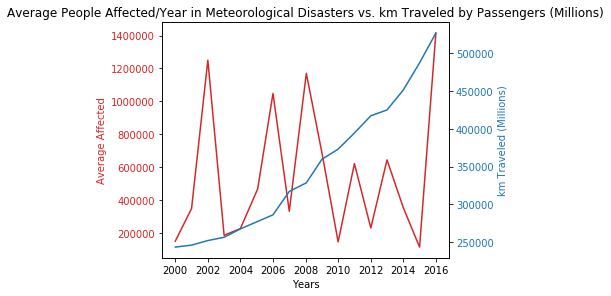

In [70]:
# Set graph values and labels

years = grouped_meteo[['Start Year']]
meteo_affected_value = grouped_meteo[['Total Affected']]
transit_mileage = grouped_transit[['Value']]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('Average Affected', color=color)
ax1.plot(years, meteo_affected_value, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('km Traveled (Millions)', color=color)
ax2.plot(years, transit_mileage, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Plot transit (assenger-kilometres, Millions) vs. meteorological disaster data

fig.tight_layout()
plt.title('Average People Affected/Year in Meteorological Disasters vs. km Traveled by Passengers (Millions)')
plt.show()


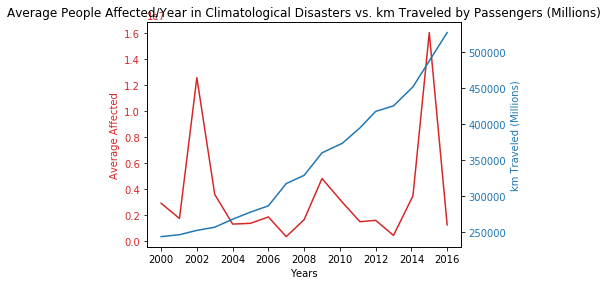

In [71]:
# Set graph values and labels

years = grouped_clima[['Start Year']]
clima_affected_value = grouped_clima[['Total Affected']]
transit_mileage = grouped_transit[['Value']]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('Average Affected', color=color)
ax1.plot(years, clima_affected_value, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('km Traveled (Millions)', color=color)
ax2.plot(years, transit_mileage, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Plot transit (assenger-kilometres, Millions) vs. climatological disaster data

fig.tight_layout()
plt.title('Average People Affected/Year in Climatological Disasters vs. km Traveled by Passengers (Millions)')
plt.show()

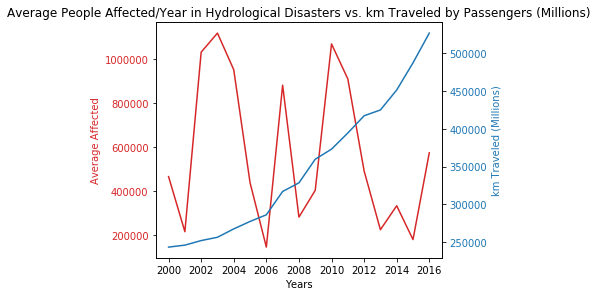

In [77]:
# Set graph values and labels

years = grouped_hydro[['Start Year']]
hydro_affected_value = grouped_hydro[['Total Affected']]
transit_mileage = grouped_transit[['Value']]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('Average Affected', color=color)
ax1.plot(years, hydro_affected_value, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('km Traveled (Millions)', color=color)
ax2.plot(years, transit_mileage, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Plot transit (assenger-kilometres, Millions) vs. meteorological disaster data

fig.tight_layout()
plt.title('Average People Affected/Year in Hydrological Disasters vs. km Traveled by Passengers (Millions)')
plt.show()

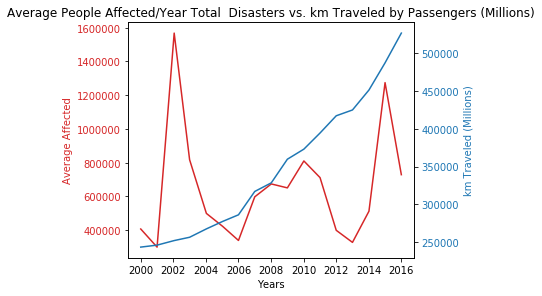

In [79]:
grouped_total_disasters

# Set graph values and labels

years = grouped_total_disasters[['Start Year']]
total_affected_value = grouped_total_disasters[['Total Affected']]
transit_mileage = grouped_transit[['Value']]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('Average Affected', color=color)
ax1.plot(years, total_affected_value, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('km Traveled (Millions)', color=color)
ax2.plot(years, transit_mileage, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Plot transit (assenger-kilometres, Millions) vs. meteorological disaster data

fig.tight_layout()
plt.title('Average People Affected/Year Total  Disasters vs. km Traveled by Passengers (Millions)')
plt.show()